In [1]:
import pandas as pd

In [2]:
expert_20 = pd.read_csv("HERA/Expert20_Labels.csv")
expert_20['MODEL'] = expert_20['MODEL'].str.split('_').str[0]
expert_20['Training'] = 'B'

In [3]:
aoflagger = pd.read_csv("HERA/AOFlagger_Labels.csv")
aoflagger['MODEL'] = aoflagger['MODEL'].str.split('_').str[0]
aoflagger['Training'] = 'A'

In [4]:
transfer = pd.read_csv("HERA/Transfer_Labels.csv")
transfer['MODEL'] = transfer['MODEL'].str.split('_').str[0]
transfer['Training'] = 'C'

In [5]:
LOFAR_RESULTS = pd.concat((aoflagger, expert_20, transfer))

In [6]:
LOFAR_RESULTS

,MODEL,AUROC,AUPRC,Best F1 Score,F1 Score,Training
0,RFDL,0.970191,0.746179,0.778295,0.771879,A
1,UNET,0.527303,0.013711,0.028358,0.027682,A
2,RNET6,0.500357,0.012279,0.024128,0.000000,A
3,UNET,0.508649,0.014708,0.038594,0.008630,A
4,RNET6,0.607237,0.036920,0.128607,0.000000,A
5,RFDL,0.971403,0.779628,0.779514,0.775309,A
6,UNET,0.501474,0.012664,0.031795,0.021255,A
7,RNET6,0.707787,0.053491,0.164989,0.000000,A
8,RFDL,0.978095,0.815757,0.793189,0.792440,A
0,RNET6,0.552217,0.031673,0.116755,0.000000,B


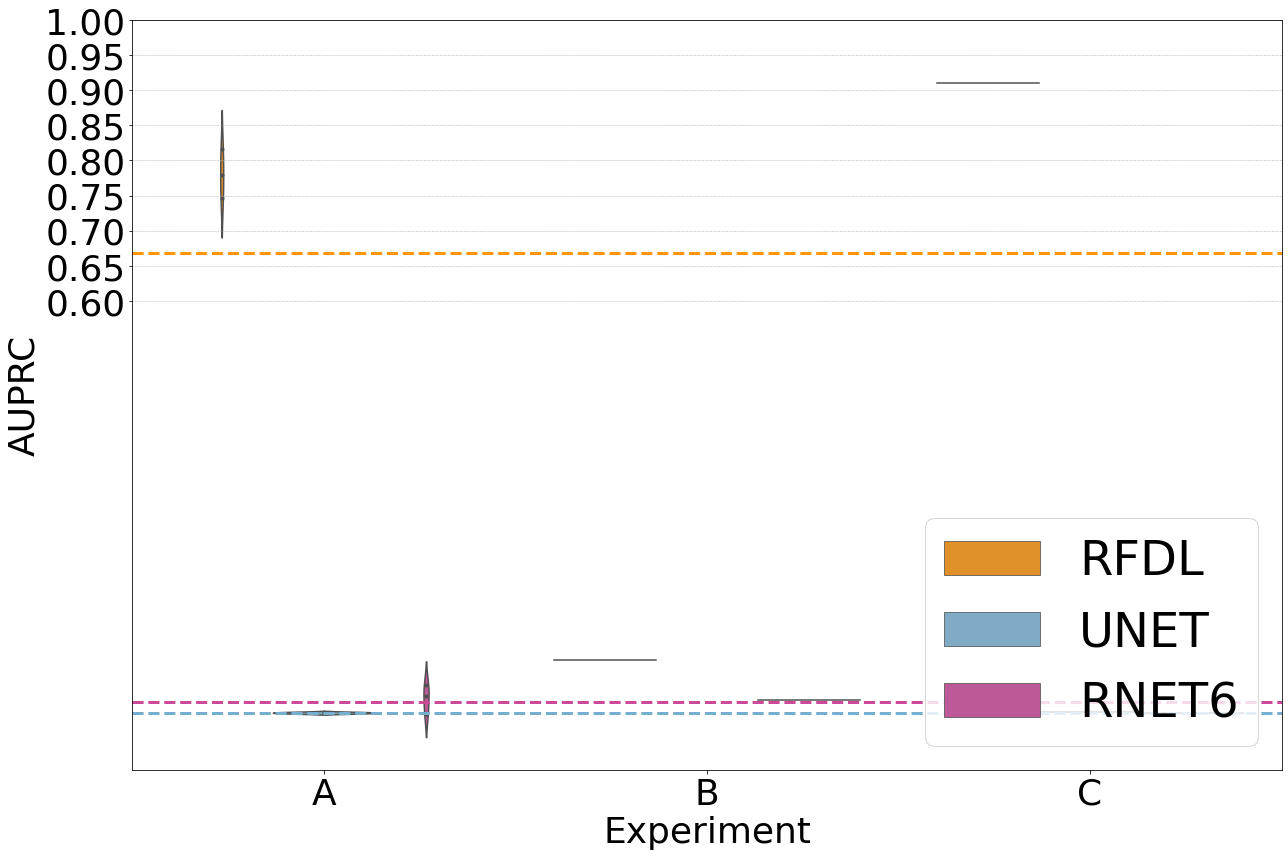

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette_dict = {
    "RFDL": "#ff950a",   # Dull orange
    "UNET": "#76aecf",   # Dull blue
    "RNET6": "#cc499a"   # Dull green
}

plt.figure(figsize=(18, 12))
sns.violinplot(x="Training", y="AUPRC", hue="MODEL", data=LOFAR_RESULTS, inner="point", palette=palette_dict)

# Computing mean AUPRC for each model and plotting horizontal lines
for model, color in palette_dict.items():
    mean_auprc = LOFAR_RESULTS[LOFAR_RESULTS["MODEL"] == model]["AUPRC"].mean()
    plt.axhline(y=mean_auprc, color=color, linestyle='--', linewidth=3)

# Adjusting legend size
plt.legend(loc="lower right", prop={'size': 48})  # Adjust size as needed

# Set grid, ticks, and their sizes
ax = plt.gca()
ax.set_yticks([i for i in np.arange(0.6, 1.05, 0.05)])
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Adjusting tick label sizes
ax.tick_params(axis='both', which='major', labelsize=36)  # Adjust size as needed

# Adjusting axis label sizes
ax.set_xlabel('Experiment', fontsize=36)  # Adjust size as needed
ax.set_ylabel('AUPRC', fontsize=36)     # Adjust size as needed

plt.tight_layout()
plt.savefig("HERA_AUPRC.pdf")
plt.show()

In [8]:
import pandas as pd

# Group by 'MODEL' and 'Training', then aggregate by mean and standard deviation
agg_funcs = ['mean', 'std']
grouped = LOFAR_RESULTS.groupby(['MODEL', 'Training']).agg({
    'AUROC': agg_funcs,
    'AUPRC': agg_funcs,
    'Best F1 Score': agg_funcs,
    'F1 Score': agg_funcs
}).reset_index()

print(grouped)

   MODEL Training     AUROC               AUPRC           Best F1 Score  \
                       mean       std      mean       std          mean   
0   RFDL        A  0.973230  0.004257  0.780521  0.034798      0.783666   
1   RFDL        B  0.734066       NaN  0.089019       NaN      0.155549   
2   RFDL        C  0.984191       NaN  0.909516       NaN      0.877577   
3  RNET6        A  0.605127  0.103731  0.034230  0.020737      0.105908   
4  RNET6        B  0.552217       NaN  0.031673       NaN      0.116755   
5  RNET6        C  0.499863       NaN  0.012984       NaN      0.025609   
6   UNET        A  0.512475  0.013333  0.013694  0.001022      0.032916   
7   UNET        C  0.519438       NaN  0.015008       NaN      0.038149   

             F1 Score            
        std      mean       std  
0  0.008269  0.779876  0.011015  
1       NaN  0.000000       NaN  
2       NaN  0.872290       NaN  
3  0.073122  0.000000  0.000000  
4       NaN  0.000000       NaN  
5       NaN